#### Load Important Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [134]:
data = pd.read_excel("death_population_final_combined.xlsx")
data.head(10)

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0
5,2006,Afghanistan,382.0,185.0,0.0,0.0,AFG,25442944.0
6,2007,Afghanistan,296.0,20.0,0.0,0.0,AFG,25903301.0
7,2008,Afghanistan,1334.0,182.0,0.0,0.0,AFG,26427199.0
8,2009,Afghanistan,101.0,86.0,20000.0,27282.0,AFG,27385307.0
9,2010,Afghanistan,350.0,200.0,0.0,0.0,AFG,28189672.0


In [135]:
data['country'].unique()

array(['Afghanistan', 'Niger', 'Indonesia', 'Peru', 'France', 'India',
       'Somalia', 'Brazil', 'China', 'Colombia', 'Sri Lanka', 'Pakistan',
       'Italy', 'Canada', 'Nigeria', 'Japan', 'Bangladesh', 'Nepal',
       'Kenya', 'United States', 'Australia', 'Vietnam', 'Argentina',
       'Haiti', 'Algeria', 'Philippines', 'Congo, Dem. Rep.', 'Guatemala',
       'Mozambique', 'Iran, Islamic Rep.', 'Mexico', 'Romania',
       'Thailand', 'Sudan', 'Turkiye', 'Albania', 'Tajikistan',
       'Honduras', 'Madagascar', 'Bolivia', 'Spain', 'South Africa',
       'Panama', 'Tanzania', 'Russian Federation', 'Uganda', 'Germany',
       'Angola', 'Dominican Republic', 'Korea, Rep.', 'Malaysia',
       'Malawi', 'Poland', 'Ethiopia', 'Greece', 'Chile', 'Myanmar',
       'New Zealand', 'Costa Rica', 'Papua New Guinea', 'Cambodia',
       'Guinea', 'Mali', 'Nicaragua', 'Paraguay', 'Rwanda', 'Switzerland',
       'United Kingdom', 'Yemen, Rep.', 'Zambia', 'Zimbabwe', 'Burundi',
       'Cuba', 'Ghana

In [136]:
# Filter the data for Afghanistan
selected_country = 'China'
country = data[data['country'] == selected_country]

# Calculate the mortality rate
country['mortality_rate'] = (country['total_deaths'] / country['population']) * 1e6
country.tail()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population,mortality_rate
202,2019,China,571.0,482.0,18646000.0,21344352.0,CHN,1.407745e+09,0.405613
203,2020,China,463.0,24.0,23092000.0,26111644.0,CHN,1.411100e+09,0.328113
204,2021,China,455.0,451.0,25556500.0,27601735.0,CHN,1.412360e+09,0.322156
205,2022,China,283.0,487.0,16000000.0,16000000.0,CHN,1.412175e+09,0.200400
206,2023,China,220.0,54.0,140235.0,0.0,CHN,1.411878e+09,0.155821


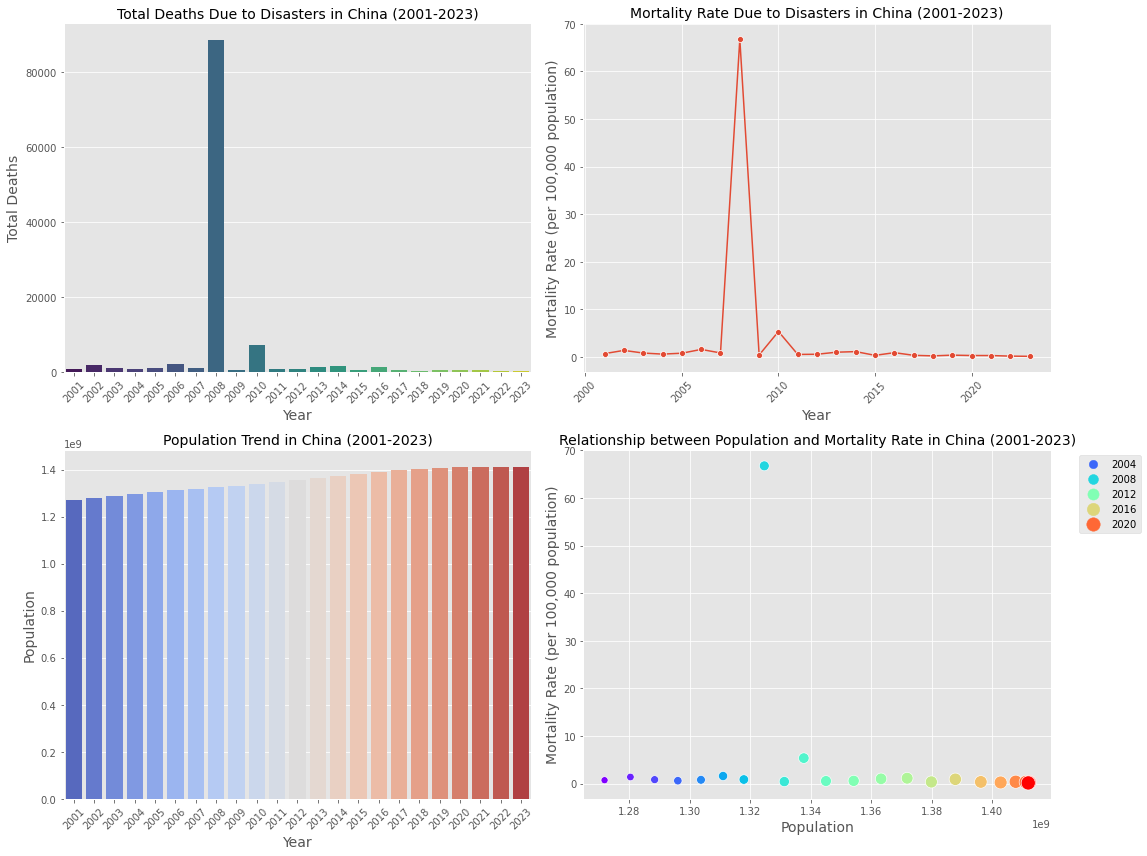

In [137]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=country, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=country, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=country, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=country, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


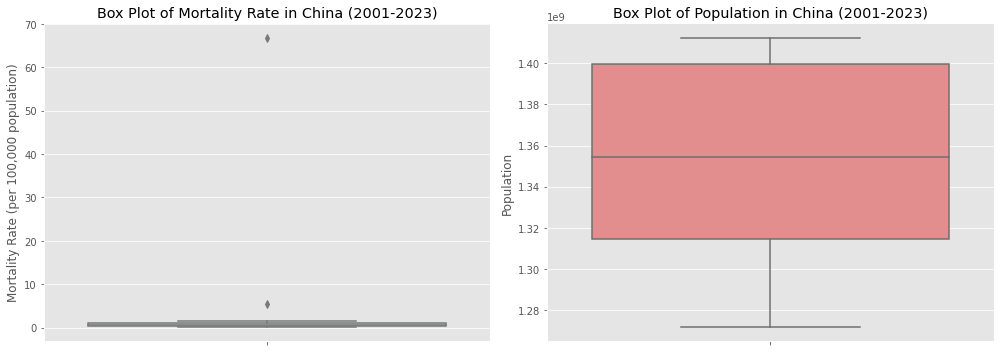

In [138]:
# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Box plot for mortality rate
sns.boxplot(y=country['mortality_rate'], ax=ax[0], color='lightblue')
ax[0].set_title(f'Box Plot of Mortality Rate in {selected_country} (2001-2023)')
ax[0].set_ylabel('Mortality Rate (per 100,000 population)')

# 3. Box plot for population
sns.boxplot(y=country['population'], ax=ax[1], color='lightcoral')
ax[1].set_title(f'Box Plot of Population in {selected_country} (2001-2023)')
ax[1].set_ylabel('Population')

plt.tight_layout()
plt.show()

In [139]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = country[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

In [140]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2008-12-31','2010-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=160,
    #holidays_prior_scale=10,
    mcmc_samples=0
)

# Now, you can fit your model on the training dataset
model.fit(train_df)

# And use the model to make predictions, then compare with the test dataset
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future_dates)

22:48:12 - cmdstanpy - INFO - Chain [1] start processing
22:48:12 - cmdstanpy - INFO - Chain [1] done processing


The MAE of the forecast is: 0.47507135029921876


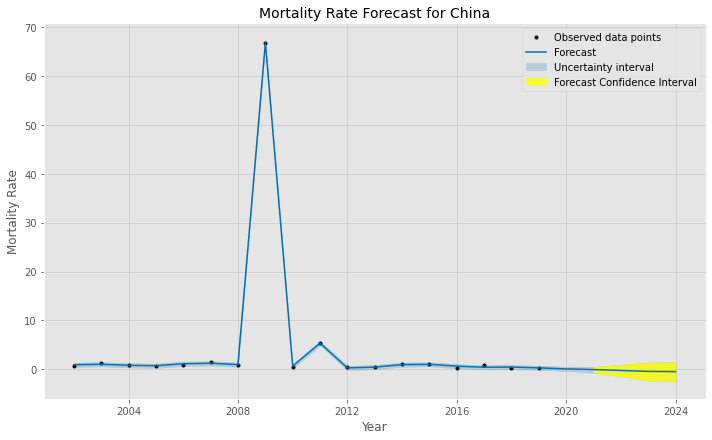

In [141]:
from sklearn.metrics import mean_absolute_error
# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Forecasting for 2023 to 2030
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast, uncertainty=True)

# Highlight the prediction (2019-2024) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] > forecast['ds'].iloc[-5]), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.set_xlabel('Year', fontsize=12)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=12)  # Set the Y-axis label
ax.set_title(f'Mortality Rate Forecast for {selected_country}', fontsize=14)  # Set the title

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)  # Set the linewidth of the legend lines

plt.show()

In [142]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds      yhat  yhat_lower  yhat_upper
17 2018-12-31  0.323998   -0.088785    0.763270
18 2019-12-31  0.110914   -0.326952    0.569466
19 2020-12-31 -0.024126   -0.681587    0.544268
20 2021-12-31 -0.208544   -1.404996    0.967621
21 2022-12-31 -0.396846   -2.273032    1.403861
22 2023-12-31 -0.444652   -2.513380    1.505399


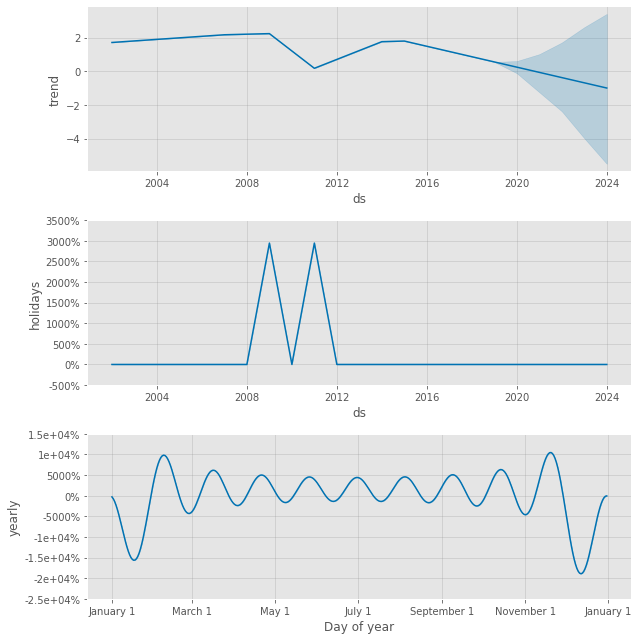

In [143]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast)